In [ ]:
# !nvidia-smi

In [ ]:
import tensorflow as tf
import numpy as np
import os
import sys
import cv2
import pickle
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D,BatchNormalization, Lambda

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

# ***Resnet50***

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in resnet.layers:
  layer.trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
x = Flatten()(resnet.output)
prediction = Dense(2, activation='sigmoid')(x)

model = Model(inputs=resnet.input, outputs=prediction)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
datagen = ImageDataGenerator(rescale= 1./255,
                            validation_split = 0.25)

In [ ]:
training_set = datagen.flow_from_directory('Pan_Pata/Train_S',
                                     target_size = (224,224),
                                     class_mode = 'categorical',
                                     subset='training')

test_set  = datagen.flow_from_directory('Pan_Pata/Train_S', 
                                      target_size = (224,224),
                                      class_mode = 'categorical',
                                      subset='validation' )

Found 3851 images belonging to 2 classes.
Found 1283 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
       training_set,
       validation_data=test_set,
       epochs=6,
       steps_per_epoch=len(training_set),
       validation_steps=len(test_set),
       callbacks = [early_stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
241/241 [==============================] - 1319s 5s/step - loss: 1.3539 - accuracy: 0.5890 - val_loss: 0.7934 - val_accuracy: 0.6033
Epoch 2/6
241/241 [==============================] - 414s 2s/step - loss: 0.6794 - accuracy: 0.6960 - val_loss: 0.6186 - val_accuracy: 0.6680
Epoch 3/6
241/241 [==============================] - 415s 2s/step - loss: 0.6450 - accuracy: 0.7082 - val_loss: 0.9811 - val_accuracy: 0.6212
Epoch 4/6
241/241 [==============================] - 416s 2s/step - loss: 0.5226 - accuracy: 0.7471 - val_loss: 0.5867 - val_accuracy: 0.6890
Epoch 5/6
241/241 [==============================] - 417s 2s/step - loss: 0.5967 - accuracy: 0.7443 - val_loss: 0.6202 - val_accuracy: 0.6843
Epoch 6/6
241/241 [==============================] - 419s 2s/step - loss: 0.4478 - accuracy: 0.7932 - val_loss: 0.7819 - val_accuracy: 0.6352


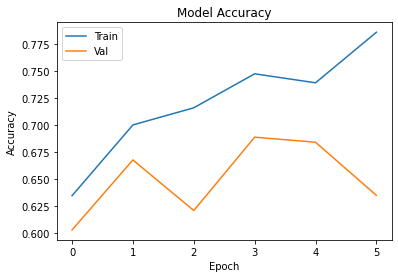

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
test_generator = test_datagen.flow_from_directory( 'Pan_Pata/Test',
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 658 images belonging to 2 classes.


In [ ]:
score = model.evaluate_generator(test_generator, 658)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print("Accuracy = ",score)

Accuracy =  [0.8627650737762451, 0.6018236875534058]


In [ ]:
pred = model.predict_generator(test_generator, 658)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_true_resnet50=test_generator.classes

In [ ]:
y_pred_resnet50=np.argmax(pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0(Benificial)', 'class 1(Harmful)']
print(classification_report(y_true_resnet50, y_pred_resnet50, target_names=target_names))

                     precision    recall  f1-score   support

class 0(Benificial)       0.77      0.29      0.42       329
   class 1(Harmful)       0.56      0.91      0.70       329

           accuracy                           0.60       658
          macro avg       0.67      0.60      0.56       658
       weighted avg       0.67      0.60      0.56       658



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true_resnet50, y_pred_resnet50))

[[ 95 234]
 [ 28 301]]
